In [1]:
#!pip install nltk

In [2]:
#!pip install wordcloud

In [3]:
#!pip install wordcloud

In [4]:
#nltk.download()

In [5]:
import nltk

In [6]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [7]:
reviews = pd.read_csv("K8 Reviews.csv")

In [8]:
reviews.tail(10)

,sentiment,review
14665,1,Worth your money.
14666,0,I am facing problem with network connection.Wh...
14667,1,Nice phone
14668,0,Not so good.
14669,0,Very poour battery parformance and prosecer
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...
14674,1,Good product but the pakeging was not enough.


This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negative sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [9]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [10]:
reviews.sentiment.value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [11]:
reviews.shape

(14675, 2)

In [12]:
reviews.review.values

array(['Good but need updates and improvements',
       "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
       'when I will get my 10% cash back.... its already 15 January..',
       ..., 'Awesome Gaget.. @ this price',
       'This phone is nice processing will be successful but dual camera is not be successfully in dual mod',
       'Good product but the pakeging was not enough.'], dtype=object)

In [13]:
sentence = "Good product, bad, ca,me,r,a"
sentence.split(",")

['Good product', ' bad', ' ca', 'me', 'r', 'a']

In [14]:
listwords = ["good product",'bad','camera']
"=".join(listwords)

'good product=bad=camera'

In [15]:
sentence = "PHOnE is GooD..."
print(sentence.lower(),sentence.upper())

phone is good... PHONE IS GOOD...


In [16]:
import re

In [17]:
allreviews = " ".join(reviews.review.values)
#allreviews = " --------$$$----- ".join(reviews.review.values)
allreviews = allreviews.lower()
allreviews = re.sub("\.",". ",allreviews)
#allreviews

In [18]:
#all_terms = allreviews.split(" ")
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(allreviews)
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [19]:
len(all_terms)

349371

In [20]:
len(set(all_terms))

13693

In [21]:
singlewordlist =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordlist.append(key)    

In [22]:
len(singlewordlist)

8227

In [23]:
print(singlewordlist)

['everthey', 'buyi', 'disappointedpoor', 'batterypoor', 'camerawaste', 'allot', 'worn', 'ahmedabad', 'hdpf', '9998.', 'galery', 'speakernormal', 'odinary', 'any1', 'bouth', 'speekars', '😒😒☹️', 'oveheated', 'bestin', 'pricefull', 'passa', 'wasole', 'bcoms', 'loosed', 'bigggggggest', 'bakwaaaasssdo', 'lowbattery', 'lowpls', 'rm', 'featurs', 'phone😍😍', 'breakups', 'vcf', 'werorst', '10000.', 'cleare', 'optionthirdly', '10999/-fourthly', 'nerve', 'fifthly', 'ensure', 'sleeping', 'cameradesignperformance', 'wrest', '☺️🙂', 'sleekness', 'controler', 'defuces', 'allahabad', 'raping', 'poorwords', 'sep-17', '25dec17', 'effecting', 'popularity', 'productcamera', 'greatsound', 'greatover', '😪', 'punching', 'sofwares', 'prpperly', 'detachable', 'xt1902-3', 'm2cb2', 'backlogs1', '3100', 'steadier', 'supplementary', 'grasp', 'sofa', 'districts', 'adjusted', 'bodru', '4000mhz', 'hrsit', 'deduced', 'lookswise', 'kharida', 'usme', 'ly', 'layla', 'inka', 'khelke', 'kenya', 'kaharidna', 'youif', 'holic',

In [24]:
fdist.keys()

dict_keys(['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', 'backup', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', 'even', 'if', 'put', 'idle', 'its', 'getting', 'discharged', '.', 'this', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'not', 'at', 'all', 'expected', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', '4000mah', 'booster', 'charger', 'fake', 'it', 'takes', 'least', '4', '5', 'be', 'fully', 'charged', 'do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'of', 'us', 'please', 'don', ';', 't', 'go', 'for', 'else', 'you', 'regret', 'me', 'when', 'get', 'my', '10', '%', 'cash', 'back', 'already', '15', 'january', 'the', 'phone', 'everthey', 'changed', 'last', 'problem', 'still', 'same', 'returning', 'highly', 'disappointing', "'m", 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 

In [25]:
326625/17602

18.556129985228953

In [26]:
from string import punctuation

In [27]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [28]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_nltk.remove("not")
punct_stop = list(punctuation) + stop_nltk + ["lenovo","phone","k8","amazon","product"]

In [30]:
listwords = [word for word in word_tokenize(allreviews) if word not in punct_stop and len(word) >2]

In [31]:
len(set(listwords))

12996

In [32]:
len(listwords)

167299

In [33]:
140000/200

700.0

In [34]:
len(punct_stop)

215

In [35]:
fdist = {}
for word in listwords:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [36]:
fdist['good']

6120

In [37]:
fdist.get("Good",0)

0

In [38]:
sentence = "phone is good, really good. nothing good about amazon, bad is amazon. really bad."
sentence

'phone is good, really good. nothing good about amazon, bad is amazon. really bad.'

In [39]:
print(sentence.split(" "), len(sentence.split(" ")), len(set(sentence.split(" "))))
print(word_tokenize(sentence), len(word_tokenize(sentence)),len(set(word_tokenize(sentence))))

['phone', 'is', 'good,', 'really', 'good.', 'nothing', 'good', 'about', 'amazon,', 'bad', 'is', 'amazon.', 'really', 'bad.'] 14 12
['phone', 'is', 'good', ',', 'really', 'good', '.', 'nothing', 'good', 'about', 'amazon', ',', 'bad', 'is', 'amazon', '.', 'really', 'bad', '.'] 19 10


In [40]:
#print(fdist["Good"],fdist['good'],fdist['good.'],fdist['gOOd'],fdist['good,'],fdist['GOOD'],fdist['goood'],fdist['gud'],fdist['good...'])

In [41]:
#good....

In [42]:
import re
sentence1 = "Phone is good.... camera is good bad, OS is okay"
sentence2 = re.sub("\.","",sentence1)
sentence2

'Phone is good camera is good bad, OS is okay'

In [43]:
sentence3 = re.sub("good","perfect",sentence1)
sentence3

'Phone is perfect.... camera is perfect bad, OS is okay'

In [44]:
fdist.get("Good",6510651651651)

6510651651651

In [45]:
fdist.get("Goodgsdrsdghsdg",6510651651651)

6510651651651

In [46]:
fdist

{'good': 6120,
 'need': 257,
 'updates': 145,
 'improvements': 7,
 'worst': 959,
 'mobile': 2511,
 'bought': 315,
 'ever': 317,
 'battery': 3466,
 'draining': 205,
 'like': 962,
 'hell': 42,
 'backup': 682,
 'hours': 424,
 'internet': 151,
 'uses': 25,
 'even': 838,
 'put': 66,
 'idle': 72,
 'getting': 409,
 'discharged': 23,
 'biggest': 30,
 'lie': 6,
 'lenove': 6,
 'not': 6124,
 'expected': 215,
 'making': 38,
 'full': 368,
 'saying': 34,
 '4000mah': 111,
 'booster': 6,
 'charger': 493,
 'fake': 66,
 'takes': 297,
 'least': 36,
 'fully': 129,
 'charged': 134,
 "n't": 1860,
 'know': 145,
 'survive': 8,
 'please': 414,
 'else': 69,
 'regret': 30,
 'get': 527,
 'cash': 35,
 'back': 693,
 'already': 77,
 'january': 11,
 'everthey': 1,
 'changed': 29,
 'last': 294,
 'problem': 1408,
 'still': 205,
 'returning': 36,
 'highly': 37,
 'disappointing': 55,
 'telling': 10,
 'buyi': 1,
 'totally': 138,
 'disappointedpoor': 1,
 'batterypoor': 1,
 'camerawaste': 1,
 'money': 675,
 'awesome': 716,


In [47]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)
df_dist

,words,freq
0,good,6120
1,need,257
2,updates,145
3,improvements,7
4,worst,959
...,...,...
12991,parformance,1
12992,prosecer,1
12993,whater,1
12994,gaget,1


In [48]:
#30321 - 26707  - 17602


<AxesSubplot:xlabel='words'>

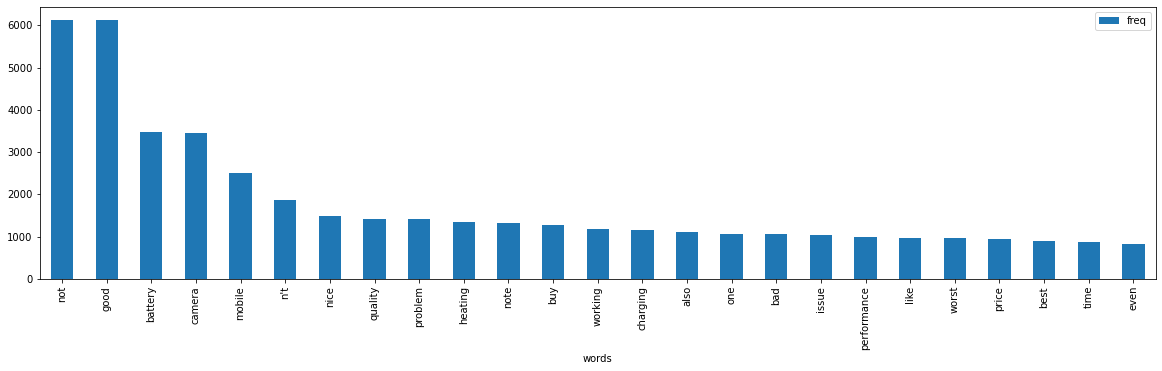

In [49]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [50]:
#1. case normalization and tokenizing

In [51]:
reviews.review[:10]

0               Good but need updates and improvements
1    Worst mobile i have bought ever, Battery is dr...
2    when I will get my 10% cash back.... its alrea...
3                                                 Good
4    The worst phone everThey have changed the last...
5    Only I'm telling don't buyI'm totally disappoi...
6    Phone is awesome. But while charging, it heats...
7                      The battery level has worn down
8    It's over hitting problems...and phone hanging...
9    A lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
from string import punctuation
from nltk.corpus import stopwords

In [54]:
stop_nltk = stopwords.words("english")

In [55]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
stop_updated = stop_nltk + list(punctuation) + ["...",".."] + ["phone", "mobile","lenovo","k8","product"]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with lenght less than 2

In [57]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word) > 2]

In [58]:
print(reviews_updated1[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged']


In [59]:
len(set(reviews_updated1))

12995

In [60]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [61]:
reviews_updated_stem = [stemmer_s.stem(word) for word in reviews_updated1]

In [62]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [63]:
reviews_updated_lemm = [lemm.lemmatize(word) for word in reviews_updated1]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'v') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'a') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 's') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'r') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'n') for word in reviews_updated_lemm]

In [64]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

10664 11270


In [65]:
lemmcleanreviews = " ".join(reviews_updated_lemm)

In [66]:
all_terms = word_tokenize(lemmcleanreviews)
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [67]:
all_terms = word_tokenize(" ".join(reviews_updated_stem))
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [68]:
singlewordliststem =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordliststem.append(key)
len(singlewordliststem)

6796

In [69]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

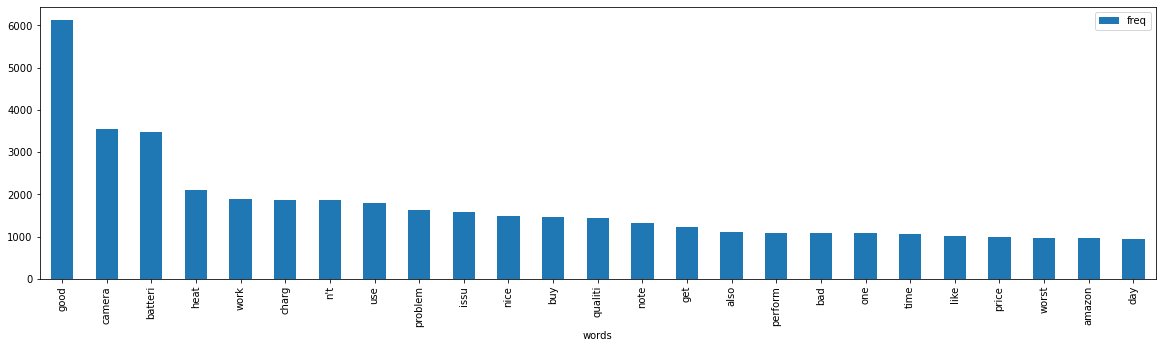

In [70]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [71]:
singlewordlist =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordlist.append(key)
len(singlewordlist)

6796

In [72]:
print(singlewordlist)

['everthey', 'buyi', 'disappointedpoor', 'batterypoor', 'camerawast', 'allot', 'worn', 'ahmedabad', 'hdpf', '9998.', 'galeri', 'speakernorm', 'odinari', 'any1', 'bouth', '😒😒☹️', 'oveh', 'bestin', 'priceful', 'passa', 'bcom', 'bigggggggest', 'bakwaaaasssdo', 'lowbatteri', 'lowpl', 'phone😍😍', 'breakup', 'vcf', 'werorst', '10000.', 'optionthird', '10999/-fourth', 'nerv', 'fifth', 'cameradesignperform', 'wrest', '☺️🙂', 'defuc', 'allahabad', 'rape', 'poorword', 'sep-17', '25dec17', 'productcamera', 'greatsound', 'greatov', 'prpper', 'detach', 'xt1902-3', 'm2cb2', 'backlogs1', '3100', 'steadier', 'supplementari', 'sofa', 'district', 'bodru', '4000mhz', 'hrsit', 'deduc', 'lookswis', 'kharida', 'usm', 'layla', 'inka', 'khelk', 'kenya', 'kaharidna', 'youif', 'holic', 'selfiein', 'parfomc', 'instruct', 'rasidul', 'kaji', 'aftwr', 'goodbelow', 'storagesat', 'dubbl', 'opet', 'flactuat', 'pc/laptop', 'supurb', 'threat', 'vain', 'rethink', 'phoen', 'meagain', 'peiceand', 'requirementsgood', 'speedgo

In [73]:
check = ['caring','not','quickly','saw','quicker','quickest','better']

In [74]:
check = [lemm.lemmatize(word) for word in check]
check = [lemm.lemmatize(word, pos = 'v') for word in check]
check = [lemm.lemmatize(word, pos = 'a') for word in check]
check = [lemm.lemmatize(word, pos = 's') for word in check]
check = [lemm.lemmatize(word, pos = 'r') for word in check]
check = [lemm.lemmatize(word, pos = 'n') for word in check]

In [75]:
check

['care', 'not', 'quickly', 'saw', 'quick', 'quick', 'good']

In [76]:
#Stememr reduces the number of distinct words in the corpus to a greater exten

# We will now apply these cleaning techniques on all the reviews by writing a UDF

In [77]:
from nltk.corpus import wordnet
def notdrop(words):    
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    return(new_words)

In [78]:
# Define function that takes in a raw string, returns a clean string
def clean_txtlemm(sent):
    sent = re.sub(r"\.",". ",sent)
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens1 = word_tokenize(sent.lower())
    for i in range(len(tokens1)):
        tokens1[i]=re.sub(r"n't","not",tokens1[i])
    #take care of negation
    tokens = notdrop(tokens1)
    lemmatized1 = [lemm.lemmatize(term, pos = 'v')  for term in tokens if term not in stop_updated and len(term) > 2]
    lemmatized2 = [lemm.lemmatize(term, pos = 'a')  for term in lemmatized1] 
    lemmatized3 = [lemm.lemmatize(term, pos = 's')  for term in lemmatized2] 
    lemmatized4 = [lemm.lemmatize(term, pos = 'r')  for term in lemmatized3] 
    lemmatized5 = [lemm.lemmatize(term, pos = 'n')  for term in lemmatized4]
    lemmatized6 = [term for term in lemmatized5 if term not in singlewordlist]
    res = " ".join(lemmatized6)
    return res

In [79]:
%%time
reviews['clean_reviewlemm'] = reviews.review.apply(clean_txtlemm)

Wall time: 6min 3s


In [80]:
reviews_combinedlemm = " ".join(reviews.clean_reviewlemm.values)

In [81]:
all_termsupdatedlemm = word_tokenize(reviews_combinedlemm.lower())
print(len(set(all_termsupdatedlemm)),len((all_termsupdatedlemm)))

7058 153723


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
# create a bigram count vectorizer object
#bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))
unigram_count_vectorizer = CountVectorizer(ngram_range=(1,2),max_features = 1000)
tfidf_count_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features = 1000)

In [84]:
X_unigram = unigram_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])
tfidfscores = tfidf_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])
# Creating a DTM
DTM_unigram = pd.DataFrame(X_unigram.toarray(), columns=unigram_count_vectorizer.get_feature_names())
TFIDFunigram = pd.DataFrame(tfidfscores.toarray(), columns=tfidf_count_vectorizer.get_feature_names())

In [85]:
DTM_unigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
(151000)/(14675*1000)

0.010289608177172062

In [87]:
tfidfscores

<14675x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 135202 stored elements in Compressed Sparse Row format>

In [88]:
TFIDFunigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
reviews

,sentiment,review,clean_reviewlemm
0,1,Good but need updates and improvements,good need update improvement
1,0,"Worst mobile i have bought ever, Battery is dr...",bad buy ever battery drain like hell backup ho...
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,bad change last problem still amazon not_retur...
...,...,...,...
14670,1,"I really like the phone, Everything is working...",really like everything work fine use
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesome take best picture dual camera sli...
14672,1,Awesome Gaget.. @ this price,awesome price
14673,1,This phone is nice processing will be successf...,nice process successful dual camera differ dua...


In [90]:
X_unigram

<14675x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 135202 stored elements in Compressed Sparse Row format>

In [91]:
TFIDFunigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
X = reviews.clean_reviewlemm.values
y = reviews.sentiment.values

In [93]:
X

array(['good need update improvement',
       'bad buy ever battery drain like hell backup hour internet use even put idle get discharge big lie amazon lenove not_at expect make full say battery 4000mah booster charger fake take least hour fully charge know survive make full please else regret like',
       'get cash back already january', ..., 'awesome price',
       'nice process successful dual camera differ dual mod',
       'good pakeging not_enough'], dtype=object)

In [94]:
y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1809)

In [199]:
from sklearn.linear_model import LogisticRegression as LR
logreg1 = LR(max_iter=10000)
logreg2 = LR(max_iter=10000)

In [97]:
?LR

In [98]:
vectorizer1 = CountVectorizer(ngram_range=(1,3),max_features = 1000)
vectorizer2 = TfidfVectorizer(ngram_range=(1,3),max_features = 1000)

In [99]:
X_train_DTM = vectorizer1.fit_transform(X_train)
X_train_TFIDF = vectorizer2.fit_transform(X_train)

In [200]:
logreg1.fit(X_train_DTM.todense(),y_train)
logreg2.fit(X_train_TFIDF.todense(),y_train)

LogisticRegression(max_iter=10000)

In [101]:
y_train_pred1 = logreg1.predict(X_train_DTM.todense())
y_train_pred2 = logreg2.predict(X_train_TFIDF.todense())

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [103]:
accuracy_score(y_train,y_train_pred1)

0.8933560477001704

In [104]:
accuracy_score(y_train,y_train_pred2)

0.8797274275979557

In [105]:
#How many paramters in the logistic regression model?
#1001
#1/(1+ exp(-alpha + beta1*x1 + beta2*x2 +... + beta1000*x1000))

In [106]:
X_test_DTM = vectorizer1.transform(X_test)
X_test_TFIDF = vectorizer2.transform(X_test)

In [107]:
y_test_pred1 = logreg1.predict(X_test_DTM)
y_test_pred2 = logreg2.predict(X_test_TFIDF)

In [108]:
accuracy_score(y_test,y_test_pred1)

0.8609880749574106

In [109]:
accuracy_score(y_test,y_test_pred2)

0.8609880749574106

In [110]:
confusion_matrix(y_test,y_test_pred2,labels = [1,0])

array([[1146,  252],
       [ 156, 1381]], dtype=int64)

In [111]:
confusion_matrix(y_test,y_test_pred2,labels = [0,1])

array([[1381,  156],
       [ 252, 1146]], dtype=int64)

In [112]:
review1 = "bad phone, pathetic battery"
review2 = "amazing phone, great camera"
review3 = "bad phone but good camera"
review4 = "bad phone but good camera good good"
review5 = "bad phone but good camera good good good"
lreview = [review1,review2,review3,review4,review5]

In [113]:
crev1 = vectorizer1.transform(lreview)
crev2 = vectorizer2.transform(lreview)

In [114]:
rpred1 = logreg1.predict(crev1.todense())
rpred2 = logreg2.predict(crev2.todense())

In [115]:
print(rpred1)
print(rpred2)

[0 1 0 0 1]
[0 1 0 1 1]


In [116]:
listofcoef1 = logreg1.coef_

In [117]:
listofcoef2 = logreg2.coef_

(array([ 2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         1.,  1.,  1.,  4.,  4.,  0.,  8.,  5.,  4.,  3.,  6.,  8.,  9.,
        10., 11., 16., 14., 18., 17., 16., 17., 31., 18., 29., 30., 32.,
        34., 31., 44., 35., 37., 39., 35., 37., 40., 32., 20., 33., 23.,
        36., 19., 20., 22., 22., 21., 10., 12.,  9.,  5., 10.,  4.,  7.,
         3.,  6.,  6.,  1.,  3.,  5.,  0.,  1.,  0.,  1.,  2.,  1.,  1.,
         2.,  0.,  0.,  2.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.51946696, -2.46494977, -2.41043257, -2.35591537, -2.30139818,
        -2.24688098, -2.19236378, -2.13784659, -2.08332939, -2.02881219,
        -1.974295  , -1.9197778 , -1.8652606 , -1.81074341, -1.75622621,
        -1.70170902, -1.64719182, -1.59267462, -1.53815743, -1.48364023,
        -1.42912303, -1.37460584, -1.32008864, -1.26557144, -1.21105425,
        -1.15653705, -1.10201985, -1.04750266, -0.99298546, -0.938468

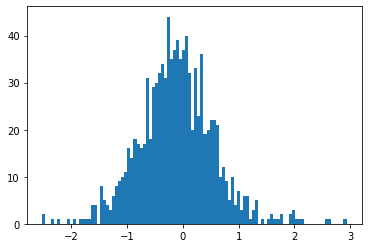

In [118]:
plt.hist(listofcoef1.T,bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   1.,
          2.,   2.,   2.,   5.,   5.,   9.,  15.,  20.,  11.,  18.,  18.,
         26.,  23.,  39.,  53.,  56.,  49.,  67., 100.,  66.,  65.,  59.,
         45.,  48.,  34.,  35.,  20.,  19.,  14.,   9.,  10.,   6.,   8.,
          5.,   3.,   4.,   0.,   3.,   4.,   0.,   1.,   4.,   1.,   0.,
          0.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-6.00627721, -5.89419404, -5.78211087, -5.6700277 , -5.55794453,
        -5.44586136, -5.33377819, -5.22169502, -5.10961186, -4.99752869,
        -4.88544552, -4.77336235, -4.66127918, -4.54919601, -4.43711284,
        -4.32502967, -4.2129465 , -4.10086333, -3.98878017, -3.876697  ,
        -3.76461383, -3.65

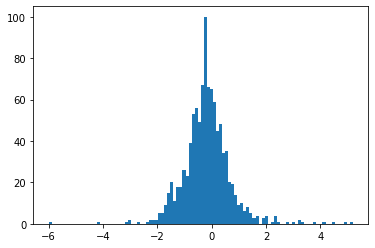

In [119]:
plt.hist(listofcoef2.T,bins=100)

In [120]:
listofcoef1 = listofcoef1.reshape(len(listofcoef1.T))
import heapq
nlargest = heapq.nlargest(20, range(len(listofcoef1)), listofcoef1.__getitem__)
print(nlargest)

[311, 52, 876, 535, 600, 428, 103, 412, 32, 875, 326, 942, 116, 65, 559, 986, 647, 11, 786, 671]


In [121]:
nsmallest = heapq.nsmallest(20, range(len(listofcoef1)), listofcoef1.__getitem__)
print(nsmallest)

[611, 64, 939, 699, 960, 626, 989, 309, 440, 278, 247, 828, 228, 869, 101, 325, 534, 760, 589, 189]


In [122]:
for i in range(20):
    print(vectorizer1.get_feature_names()[nlargest[i]])

excellent
awesome
superb
love
nice
happy
best
great
amaze
super
fantastic
value money
bokeh effect
bad bad
memory card
worth
opinion
4000mah battery
satisfy
perfect


# The reason 'bad bad' being positive is justified because whereever it appears, 'bad' also appears twice, which has a large negative beta, which can compensate for the postivity 'bad bad' is trying to bring.
Something similar to the multi-collinearity issue in linear regression, where these things are observed once in a while

In [123]:
for i in range(20):
    print(vectorizer1.get_feature_names()[nsmallest[i]])

not_a good
bad
useless
poor
waste
not_very
worthlessness
evil
heat fast
drain fast
definitely
slow
customer
store
bed
fall_short_of
loud
refund
negate
cheat


In [124]:
listofcoef2 = listofcoef2.reshape(len(listofcoef2.T))
import heapq
nlargest = heapq.nlargest(20, range(len(listofcoef2)), listofcoef2.__getitem__)
nsmallest = heapq.nsmallest(20, range(len(listofcoef2)), listofcoef2.__getitem__)

In [125]:
for i in range(20):
    print(vectorizer2.get_feature_names()[nlargest[i]])

awesome
excellent
best
great
superb
amaze
love
nice
worth
super
happy
satisfy
good
fantastic
value money
budget
everything
price
perfect
really good


In [126]:
for i in range(20):
    print(vectorizer2.get_feature_names()[nsmallest[i]])

bad
poor
evil
waste
idle
disappoint
slow
heat
worthlessness
not_a good
drain
app
fall_short_of
unable
replacement
useless
return
speaker
dont
drain fast


In [127]:
listofcoef2

array([-1.48342131e-01,  2.01234601e-01,  3.29508237e-01,  6.73010560e-02,
       -3.88408832e-01, -3.79847117e-01, -1.32913226e+00, -2.06897510e-01,
        3.28170226e-01, -7.71965982e-02, -2.54296410e-01,  4.92136213e-01,
       -1.59060703e-01, -2.78392875e-01, -2.51892579e-01,  2.88085342e-01,
       -4.97654328e-01,  7.11659660e-01, -1.54132303e-01, -1.14034711e+00,
        2.90527657e-01, -5.62339525e-01,  6.84536454e-02, -2.70062174e-01,
       -4.36309755e-01, -5.43557981e-01, -2.05291718e-02, -6.33477383e-01,
        1.28738973e+00, -3.30032640e-01,  1.37745794e-01, -5.01838930e-01,
        3.40756872e+00, -1.31913236e-01, -3.85911814e-01, -3.06591956e-01,
        5.21430149e-01, -1.84714451e-01, -1.84026016e-01, -1.57366202e-01,
       -2.04369383e+00, -5.62477780e-01, -2.39557462e-01, -8.00949451e-02,
        5.29605479e-01, -5.24884532e-01, -3.76925372e-01, -3.76405188e-01,
       -6.84476115e-01, -1.12957596e+00, -4.15307457e-01, -1.57903746e+00,
        5.20203969e+00,  

In [128]:
listofcoef1

array([-1.45503003e-01,  4.47940747e-01,  4.37872335e-01,  6.59068679e-02,
       -6.86529497e-01,  1.05985349e-01, -1.41434158e+00, -3.97960767e-01,
        1.27604286e+00, -1.46663089e-01, -1.15273496e-01,  1.51687271e+00,
        3.15736120e-01, -8.14382706e-02,  2.28774007e-01,  3.12692978e-01,
       -5.20071953e-01,  5.87432967e-01, -3.75403051e-01, -1.07228854e+00,
        8.77024632e-01, -8.66927032e-01,  5.59552087e-01, -3.88809328e-01,
       -2.25295505e-01,  5.08889209e-02,  7.57571428e-01, -2.55177854e-01,
       -3.21754331e-01, -1.05549203e-01,  2.26565696e-01,  4.09596116e-01,
        1.96334536e+00,  9.40399772e-03, -2.47290267e-01, -6.24643165e-01,
        3.16621478e-01, -3.49271317e-01, -3.85262544e-02, -5.77056138e-02,
       -8.15995018e-01, -2.98333793e-01,  4.01011751e-01, -3.11549601e-01,
        1.04341244e+00,  9.74604529e-02, -4.66924949e-01, -2.06550110e-01,
       -3.96536708e-01, -4.12459180e-01, -5.98032617e-01, -7.37289174e-01,
        2.61623499e+00, -

# Plot the bar graph for top 25 frequenctly used bigrams

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)

In [131]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [132]:
bigram_count_vectorizer.get_feature_names()[:20]

['100 battery',
 '100 charge',
 '15w turbo',
 '3gb ram',
 '3rd class',
 '4000 mah',
 '4000mah battery',
 '4gb ram',
 '5mp camera',
 'affordable price',
 'already use',
 'also bad',
 'also battery',
 'also buy',
 'also camera',
 'also charge',
 'also drain',
 'also evil',
 'also fast',
 'also get']

In [133]:
DTM_bigram.head()

,100 battery,100 charge,15w turbo,3gb ram,3rd class,4000 mah,4000mah battery,4gb ram,5mp camera,affordable price,...,worth buy,worth every,worth money,worth price,worthlessness money,would good,would like,would say,write review,youtube video
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

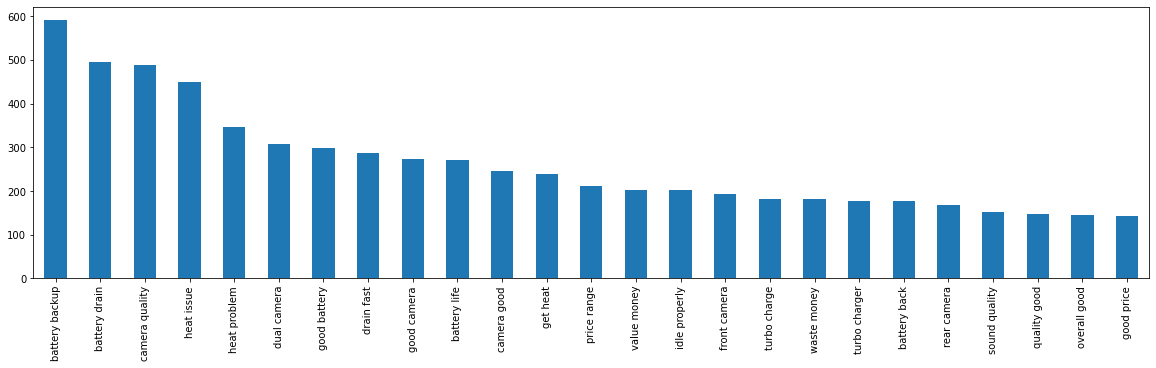

In [134]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words
 - "battery drain"
 -"Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

### Cosine Similarity

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

In [201]:
tfidfvectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3))

In [202]:
X = tfidfvectorizer.fit_transform(reviews['clean_reviewlemm'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())
df_tfidf

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df_tfidf[100:101], df_tfidf[20:21])

array([[0.08544553]])

In [204]:
df_tfidf[0:1]

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
cosimreviews = cosine_similarity(df_tfidf)
cosimreviews = pd.DataFrame(cosimreviews)
cosimreviews

,0,1,2,3,4,5,6,7,8,9,...,14665,14666,14667,14668,14669,14670,14671,14672,14673,14674
0,1.000000,0.000000,0.000000,0.220434,0.0000,0.0,0.000000,0.000000,0.000000,0.033154,...,0.0,0.000000,0.000000,0.057297,0.000000,0.000000,0.000000,0.000000,0.000000,0.220434
1,0.000000,1.000000,0.026205,0.000000,0.0764,0.0,0.024745,0.053872,0.000000,0.022446,...,0.0,0.046594,0.000000,0.000000,0.148467,0.093577,0.031226,0.000000,0.000000,0.000000
2,0.000000,0.026205,1.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047486,0.000000,0.000000,0.000000
3,0.220434,0.000000,0.000000,1.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.150404,...,0.0,0.000000,0.000000,0.259929,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.076400,0.000000,0.000000,1.0000,0.0,0.000000,0.000000,0.201478,0.000000,...,0.0,0.117947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.000000,0.093577,0.000000,0.000000,0.0000,0.0,0.134797,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
14671,0.000000,0.031226,0.047486,0.000000,0.0000,0.0,0.132189,0.034682,0.028510,0.000000,...,0.0,0.000000,0.000000,0.000000,0.095582,0.000000,1.000000,0.217949,0.183485,0.000000
14672,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.231172,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.217949,1.000000,0.000000,0.000000
14673,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.231667,0.000000,0.000000,0.000000,0.183485,0.000000,1.000000,0.000000


In [206]:
def get_similar_reviews(input_review, cosimreviews):
    cos_vals = cosimreviews[input_review].sort_values(ascending=False)
    similar_rev = cos_vals.drop(input_review).head(5)
    return similar_rev

In [207]:
get_similar_reviews(100, cosimreviews)

8195     0.870619
6624     0.870619
12667    0.870619
8731     0.870619
4828     0.804726
Name: 100, dtype: float64

In [208]:
reviews.clean_reviewlemm[100]

'good sep get cash back way make fool call cash back lol'

In [209]:
reviews.clean_reviewlemm[12667]

'goodi not_recived cash back'

In [210]:
cs = cosine_similarity(df_tfidf.T)
cswords = pd.DataFrame(cs, columns = tfidfvectorizer.get_feature_names(), index = tfidfvectorizer.get_feature_names())
cswords

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
100,1.000000,0.002204,0.004816,0.031947,0.000000,0.004619,0.005758,0.000000,0.037227,0.040181,...,0.020518,0.015876,0.024971,0.005453,0.004960,0.012753,0.000284,0.006268,0.000000,0.007641
13mp,0.002204,1.000000,0.003257,0.003196,0.000000,0.000000,0.003218,0.000000,0.000457,0.000551,...,0.002049,0.000000,0.000000,0.000000,0.036083,0.000000,0.000422,0.000000,0.000000,0.014085
14k,0.004816,0.003257,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000962,0.001159,...,0.009704,0.004392,0.007090,0.006149,0.000000,0.001049,0.000000,0.000000,0.001014,0.014363
1st,0.031947,0.003196,0.000000,1.000000,0.044188,0.008229,0.026113,0.015800,0.034229,0.032090,...,0.006978,0.000000,0.000000,0.025210,0.000000,0.036570,0.009496,0.000000,0.004619,0.008251
2017,0.000000,0.000000,0.000000,0.044188,1.000000,0.087170,0.000000,0.000000,0.000925,0.001114,...,0.019116,0.002783,0.000000,0.018477,0.000000,0.007826,0.003015,0.000000,0.001326,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0.012753,0.000000,0.001049,0.036570,0.007826,0.035847,0.000000,0.049342,0.002210,0.002662,...,0.023156,0.016299,0.000000,0.014465,0.000000,1.000000,0.000000,0.000000,0.031599,0.000000
yes,0.000284,0.000422,0.000000,0.009496,0.003015,0.000000,0.000000,0.001231,0.010252,0.012350,...,0.005894,0.004752,0.000000,0.000504,0.000000,0.000000,1.000000,0.000000,0.000000,0.002941
yesterday,0.006268,0.000000,0.000000,0.000000,0.000000,0.118276,0.031003,0.000000,0.007435,0.000000,...,0.003111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.008017
yet,0.000000,0.000000,0.001014,0.004619,0.001326,0.019988,0.000000,0.004834,0.000000,0.000000,...,0.013004,0.004360,0.000000,0.000000,0.000000,0.031599,0.000000,0.000000,1.000000,0.023214


In [211]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [213]:
sim_mat = cosine_similarity(df_tfidf.T)

sim_mat = pd.DataFrame(sim_mat, columns= df_tfidf.columns, index= df_tfidf.columns)

get_similar_words('bad bad', sim_mat)

bad                 0.148348
customer service    0.062153
bad battery         0.062110
bad camera          0.057317
bring               0.049637
Name: bad bad, dtype: float64

In [147]:
#Understanding how the function works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

take     0.361721
turbo    0.318815
hour     0.315991
heat     0.231828
full     0.219013
Name: charge, dtype: float64

In [148]:
reviews.iloc[11]

sentiment                                                           1
review              Good phone but charger not working / damage wi...
clean_reviewlemm                good charger idle damage within month
Name: 11, dtype: object

In [149]:
cs[11,0]

0.0

In [192]:
word = 'excellent'
cswords[word].sort_values(ascending = False).head(6)

excellent      1.000000
feature        0.061317
performance    0.054749
camera         0.050034
service        0.042288
amazon         0.039842
Name: excellent, dtype: float64

In [191]:
cswords[word].sort_values(ascending = False).drop(word).head(5)

ever          0.157756
buy           0.147624
battery       0.137070
camera        0.134124
experience    0.129205
Name: bad, dtype: float64

In [214]:
countvectorizer = CountVectorizer(max_features=1000, ngram_range=(1,3))

In [217]:
X = countvectorizer.fit_transform(reviews['clean_reviewlemm'])
df_tfidf = pd.DataFrame(X.toarray(),columns=countvectorizer.get_feature_names())
df_tfidf['bad bad'].sum()

35

In [226]:
counter = 0
sentimentcount = 0
for i in range(14675):
    if df_tfidf['bad bad'][i] >0 :
        counter = counter +1
        if reviews['sentiment'][i]==1:
            sentimentcount = sentimentcount + 1

In [224]:
reviews.sentiment

0        1
1        0
2        1
3        1
4        0
        ..
14670    1
14671    1
14672    1
14673    1
14674    1
Name: sentiment, Length: 14675, dtype: int64

In [221]:
counter

31

In [227]:
sentimentcount

2

In [219]:
df_tfidf['bad bad'][1]

0